# sklearn初步

In [12]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

# 数据预处理
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# 定义模型
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

# 模型训练
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8947368421052632

# sklearn技能

-  数据预处理；
- 特征编码 & 特征工程；  
- 模型训练与验证；
- 常见机器学习模型；
- 模型评价函数 & 误差分析；


## 数据预处理

### StandardScaler

In [13]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)

X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [14]:
X_scaled.mean(0), X_scaled.std(0),

(array([0., 0., 0.]), array([1., 1., 1.]))

In [15]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

### MinMaxScaler

In [16]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [17]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

### MaxAbsScaler

In [18]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [19]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs


array([[-1.5, -1. ,  2. ]])

### RobustScaler

In [20]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],
     [ -2.,  1.,  3.],
     [ 4.,  1., -2.]]
transformer = RobustScaler().fit(X)
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

### QuantileTransformer

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100]) 

/home/lyz/work/github/scikit-learn-master/sklearn/preprocessing/_data.py:2562: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([4.3, 5.1, 5.8, 6.5, 7.9])

### PowerTransformer

In [22]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
X_lognormal

array([[1.28331718, 1.18092228, 0.84160269],
       [0.94293279, 1.60960836, 0.3879099 ],
       [1.35235668, 0.21715673, 1.09977091]])

### Normalizer

In [23]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')
X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [24]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### SimpleImputer

In [25]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], 
         [np.nan, 3], 
         [7, 6]])

X = [[np.nan, 2], 
     [6, np.nan], 
     [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [25]:
import pandas as pd
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")

imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### KNNImputer

In [26]:
import numpy as np
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], 
     [3, 4, 3], 
     [nan, 6, 5], 
     [8, 8, 7]]

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## 特征编码 & 特征工程

### OrdinalEncoder

In [30]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

### OneHotEncoder

In [31]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

### PolynomialFeatures

In [38]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
print(X)

# a b
# 1 a b ab a*a b*b
poly = PolynomialFeatures(2)
poly.fit_transform(X)
# poly = PolynomialFeatures(interaction_only=True)
# poly.fit_transform(X)

[[0 1]
 [2 3]
 [4 5]]


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

## 模型训练与验证

### IRIS

In [1]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8947368421052632
0.8947368421052632


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print(cross_val_score(knn, X_train, y_train, cv=5))

print(cross_val_predict(knn, X_train, y_train, cv=5))
print(y_train)

[0.95652174 1.         1.         0.90909091 1.        ]
[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 1 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 2 1 1 0 1 1 0 2 1 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]
[1 0 1 1 1 0 0 1 0 2 0 0 1 2 0 1 2 2 1 1 0 0 2 0 0 2 1 1 2 2 2 2 0 0 1 1 0
 1 2 1 2 0 2 0 1 0 2 1 0 2 2 0 0 2 0 0 0 2 2 0 1 0 1 0 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 2 2 0 1 1 2 1 0 0 1 1 1 0 1 1 0 2 2 2 1 2 0 1 0 0 0 2 1 2 1 2 1 2
 0]


### MNIST

In [60]:
dfTrain = pd.read_csv('https://cdn.coggle.club/kaggle-digit-recognizer/train.csv.zip')
dfTest = pd.read_csv('https://cdn.coggle.club/kaggle-digit-recognizer/test.csv.zip')

y = dfTrain['label'].values.flatten()
x = dfTrain.drop(['label'],axis=1).values 

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_dev, y_train,  y_dev = train_test_split(x,y,random_state=42)

Populating the interactive namespace from numpy and matplotlib


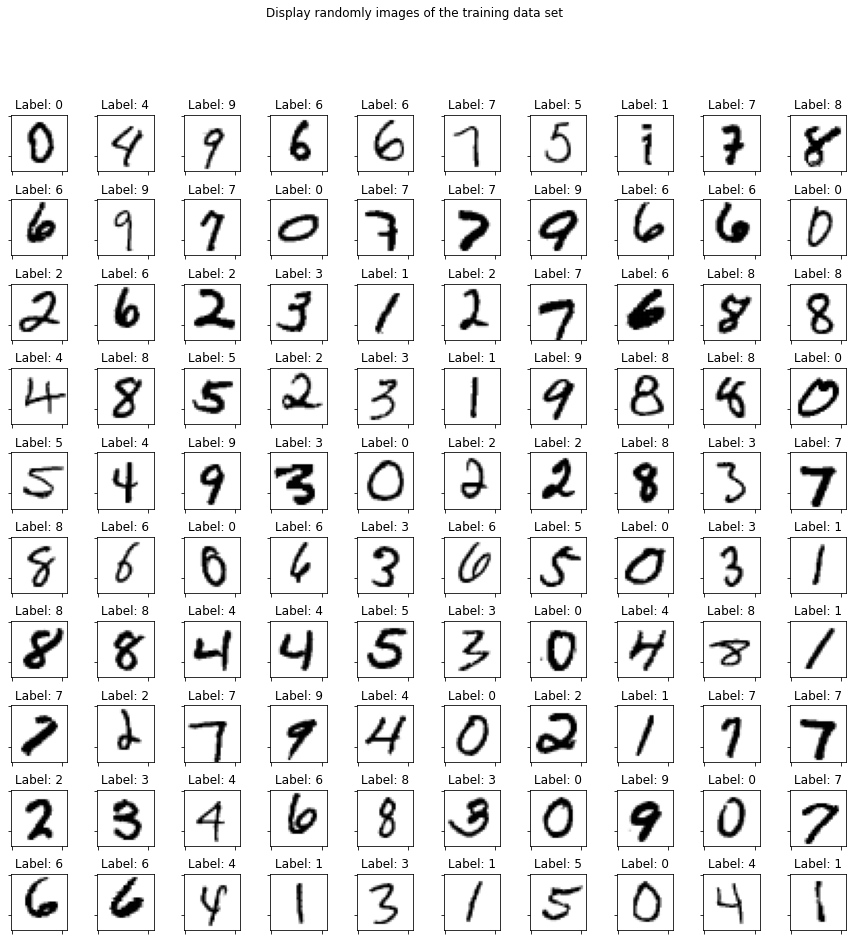

In [64]:
%pylab inline
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train,y_train)

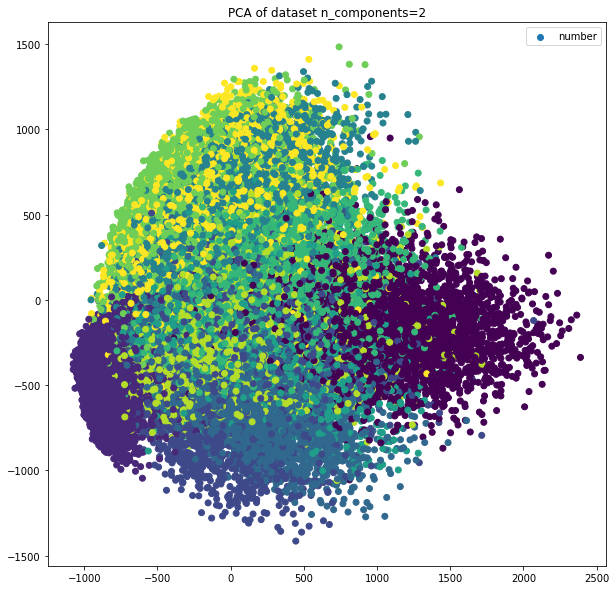

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(x)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.set_title('PCA of dataset n_components=2')
ax.scatter(proj[:,0],proj[:,1],c=y, label='number')
ax.legend()

#### MLP

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import scipy

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(1000,),  random_state=1 ) 
best_model = clf.fit(x/255.0, y)

In [69]:
dfTrain['label_predicted'] =  best_model.predict(x/255.0)
dfTrain['valid_predicted'] = dfTrain.apply(lambda row: row['label_predicted']==row['label'], axis=1)
y_test_pred = best_model.predict(x)

Text(0.5, 69.0, 'predicted label')

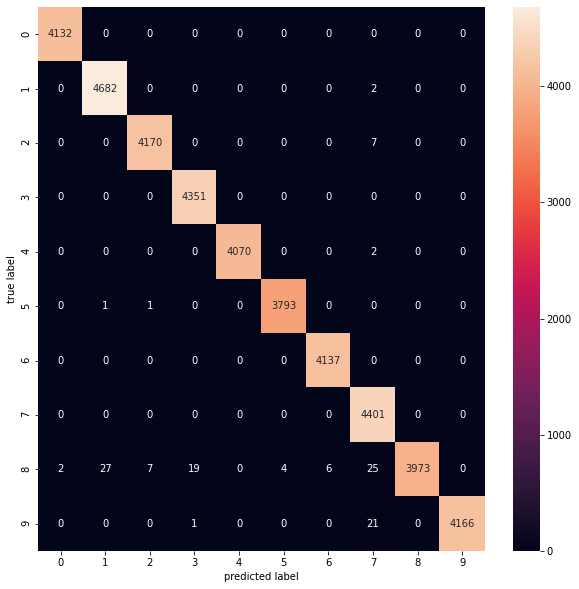

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

In [72]:
print(classification_report(y, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4132
           1       0.99      1.00      1.00      4684
           2       1.00      1.00      1.00      4177
           3       1.00      1.00      1.00      4351
           4       1.00      1.00      1.00      4072
           5       1.00      1.00      1.00      3795
           6       1.00      1.00      1.00      4137
           7       0.99      1.00      0.99      4401
           8       1.00      0.98      0.99      4063
           9       1.00      0.99      1.00      4188

    accuracy                           1.00     42000
   macro avg       1.00      1.00      1.00     42000
weighted avg       1.00      1.00      1.00     42000



#### KNN

In [77]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)

y_test_pred = cross_val_predict(knn, x, y, cv=5)

Text(0.5, 69.0, 'predicted label')

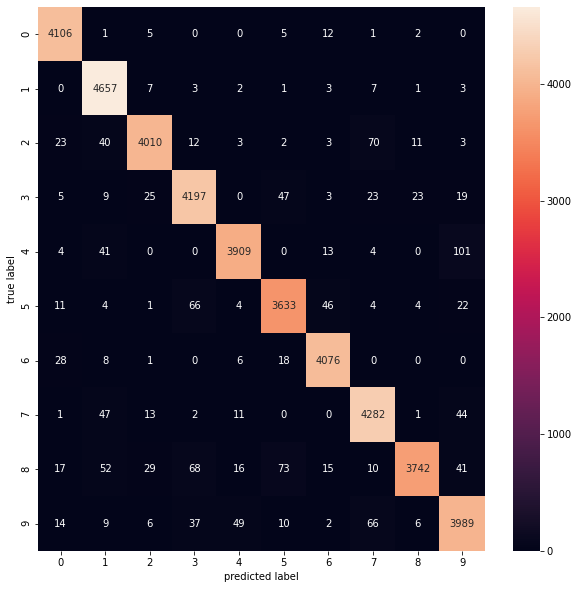

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

In [79]:
print(classification_report(y, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4132
           1       0.96      0.99      0.98      4684
           2       0.98      0.96      0.97      4177
           3       0.96      0.96      0.96      4351
           4       0.98      0.96      0.97      4072
           5       0.96      0.96      0.96      3795
           6       0.98      0.99      0.98      4137
           7       0.96      0.97      0.97      4401
           8       0.99      0.92      0.95      4063
           9       0.94      0.95      0.95      4188

    accuracy                           0.97     42000
   macro avg       0.97      0.97      0.97     42000
weighted avg       0.97      0.97      0.97     42000



#### RidgeClassifier

In [81]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import 
clf = RidgeClassifier()
clf.fit(x, y)
y_test_pred = cross_val_predict(knn, x, y, cv=5)

Text(0.5, 69.0, 'predicted label')

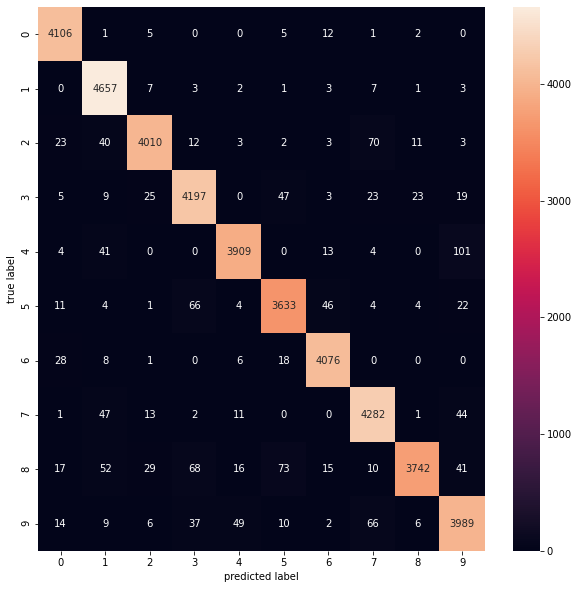

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
confusion_matrix = confusion_matrix(y, y_test_pred)
fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix, annot=True, ax=ax, fmt='g',vmin=0)
ax.set_ylabel("true label")
ax.set_xlabel("predicted label")

In [83]:
print(classification_report(y, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4132
           1       0.96      0.99      0.98      4684
           2       0.98      0.96      0.97      4177
           3       0.96      0.96      0.96      4351
           4       0.98      0.96      0.97      4072
           5       0.96      0.96      0.96      3795
           6       0.98      0.99      0.98      4137
           7       0.96      0.97      0.97      4401
           8       0.99      0.92      0.95      4063
           9       0.94      0.95      0.95      4188

    accuracy                           0.97     42000
   macro avg       0.97      0.97      0.97     42000
weighted avg       0.97      0.97      0.97     42000



# sklearn建模流程

## 数据划分方法

In [1]:
# hold-out
from sklearn.model_selection import train_test_split

# K折交叉验证
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

# K折分布保持交叉验证
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# 时间序列划分方法
from sklearn.model_selection import TimeSeriesSplit

# booststrap 采样
from sklearn.utils import resample

In [2]:
# X = np.zeros((20, 5))
# Y = np.array([1, 2, 3, 4] * 5)
# print(X, Y)

import numpy as np
X = np.zeros((20, 5))
Y = np.array([1]*5 + [2]*5 + [3]*5 + [4]*5)
print(X, Y)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] [1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]


In [4]:
# 直接按照比例拆分
# train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size = 0.2)
# print(train_y, val_y)

# 按照比例 & 标签分布划分
train_X, val_X, train_y, val_y = train_test_split(X, Y, test_size = 0.2, stratify=Y)
print(train_y, val_y)

[2 1 4 4 3 4 1 2 1 2 3 4 1 3 3 2] [2 4 3 1]


In [5]:
kf = KFold(n_splits=5)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [0 1 2 3]
Label [1 1 1 1]

[ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19] [4 5 6 7]
Label [1 2 2 2]

[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19] [ 8  9 10 11]
Label [2 2 3 3]

[ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19] [12 13 14 15]
Label [3 3 3 4]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16 17 18 19]
Label [4 4 4 4]



In [89]:
kf = RepeatedKFold(n_splits=5, n_repeats=2)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 0  1  2  3  5  6  8  9 10 11 12 13 14 15 16 17] [ 4  7 18 19]
Label [1 2 4 4]

[ 2  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19] [ 0  1  3 13]
Label [1 1 1 3]

[ 0  1  3  4  5  6  7 10 12 13 14 15 16 17 18 19] [ 2  8  9 11]
Label [1 2 2 3]

[ 0  1  2  3  4  7  8  9 11 12 13 14 15 16 18 19] [ 5  6 10 17]
Label [2 2 3 4]

[ 0  1  2  3  4  5  6  7  8  9 10 11 13 17 18 19] [12 14 15 16]
Label [3 3 4 4]

[ 0  2  3  4  5  6  7 10 11 12 13 14 15 16 18 19] [ 1  8  9 17]
Label [1 2 2 4]

[ 0  1  2  4  6  7  8  9 10 11 12 14 15 16 17 18] [ 3  5 13 19]
Label [1 2 3 4]

[ 0  1  3  4  5  7  8  9 11 13 14 15 16 17 18 19] [ 2  6 10 12]
Label [1 2 3 3]

[ 1  2  3  4  5  6  8  9 10 12 13 14 15 17 18 19] [ 0  7 11 16]
Label [1 2 3 4]

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 16 17 19] [ 4 14 15 18]
Label [1 3 4 4]



In [90]:
kf = StratifiedKFold(n_splits=5)
for train_idx, test_idx, in kf.split(X, Y):
    print(train_idx, test_idx)
    print('Label', Y[test_idx])
    print('')

[ 1  2  3  4  6  7  8  9 11 12 13 14 16 17 18 19] [ 0  5 10 15]
Label [1 2 3 4]

[ 0  2  3  4  5  7  8  9 10 12 13 14 15 17 18 19] [ 1  6 11 16]
Label [1 2 3 4]

[ 0  1  3  4  5  6  8  9 10 11 13 14 15 16 18 19] [ 2  7 12 17]
Label [1 2 3 4]

[ 0  1  2  4  5  6  7  9 10 11 12 14 15 16 17 19] [ 3  8 13 18]
Label [1 2 3 4]

[ 0  1  2  3  5  6  7  8 10 11 12 13 15 16 17 18] [ 4  9 14 19]
Label [1 2 3 4]



## 模型调参方法

- 人工调参
- 机器调参（遗传算法、贝叶斯优化）

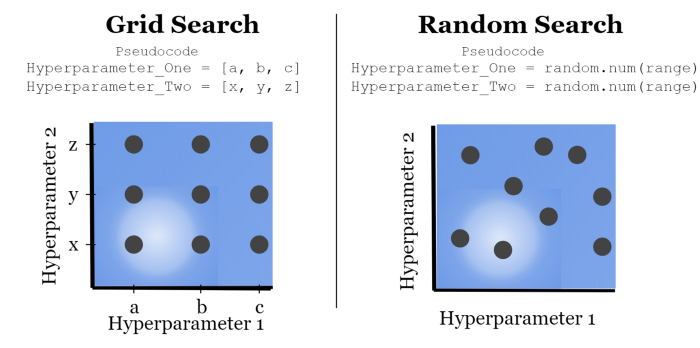

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search = RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

random_search.fit(X, y)

/home/lyz/work/github/scikit-learn-master/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 10]},
                   random_state=1)

In [99]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'learning_rate': 0.05}

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
num_estimators = [50,10]
learn_rates = [0.02, 0.05]
max_depths = [1, 2]
min_samples_leaf = [5,10]
min_samples_split = [5,10]

iris = datasets.load_iris() 
X, y = iris.data[:, :], iris.target

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingClassifier(), param_grid, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

random_search.fit(X, y)

/home/lyz/work/github/scikit-learn-master/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.05],
                                        'max_depth': [1, 2],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 10]},
                   random_state=1)

In [96]:
random_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 2,
 'learning_rate': 0.05}

# sklearn建模案例

- 案例：Titanic Machine Learning from Disaster
    - https://www.kaggle.com/c/titanic
    - 代码：https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy


- 案例：Mercari Price Suggestion Challenge
    - https://www.kaggle.com/c/mercari-price-suggestion-challenge
    - 代码：https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s


- 案例：Spooky Author Identification
    - https://www.kaggle.com/c/spooky-author-identification/
    - 代码：https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines/


- 案例：中诚信征信金融风控